# Housing Market Predictions Using Economic and Societal Factors

## Data Transformation and Cleaning

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
#importing csv data
housing_df=pd.read_csv("UK-HPI-full-file-2023-09.csv")
#checking the housing_data
housing_df.tail(20)

,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
138130,01/02/2022,Yorkshire and The Humber,E12000003,196326.53128,144.178893,143.261631,0.731221,8.276815,195077.50688,6114.0,...,254753.84286,153.413604,-2.131237,10.571715,213.0,192297.14426,143.253479,0.850351,7.849401,5901.0
138131,01/03/2022,Yorkshire and The Humber,E12000003,195568.34824,143.622096,143.205065,-0.386185,6.758160,195000.48236,6348.0,...,254267.00506,153.120428,-0.191101,7.221213,319.0,191539.15712,142.688810,-0.394175,6.532433,6029.0
138132,01/04/2022,Yorkshire and The Humber,E12000003,197693.00000,145.200000,143.700000,1.100000,9.800000,195708.00000,6145.0,...,250785.00000,151.000000,-1.400000,4.600000,391.0,193815.00000,144.400000,1.200000,10.000000,5754.0
138133,01/05/2022,Yorkshire and The Humber,E12000003,202221.00000,148.500000,146.600000,2.300000,11.200000,199619.00000,5962.0,...,258956.00000,155.900000,3.300000,11.800000,309.0,198178.00000,147.600000,2.300000,10.900000,5653.0
138134,01/06/2022,Yorkshire and The Humber,E12000003,203451.00000,149.400000,146.800000,0.600000,3.900000,199875.00000,6269.0,...,254434.00000,153.200000,-1.700000,4.500000,603.0,199577.00000,148.700000,0.700000,3.400000,5666.0
138135,01/07/2022,Yorkshire and The Humber,E12000003,207504.00000,152.400000,149.200000,2.000000,15.300000,203149.00000,6805.0,...,264166.00000,159.100000,3.800000,11.100000,357.0,203404.00000,151.500000,1.900000,15.400000,6448.0
138136,01/08/2022,Yorkshire and The Humber,E12000003,208752.00000,153.300000,149.800000,0.600000,12.000000,203990.00000,6901.0,...,265622.00000,160.000000,0.600000,14.000000,369.0,204632.00000,152.400000,0.600000,11.500000,6532.0
138137,01/09/2022,Yorkshire and The Humber,E12000003,210234.00000,154.400000,150.900000,0.700000,7.300000,205480.00000,6960.0,...,272980.00000,164.400000,2.800000,9.600000,535.0,205914.00000,153.400000,0.600000,6.800000,6425.0
138138,01/10/2022,Yorkshire and The Humber,E12000003,210664.00000,154.700000,151.500000,0.200000,13.300000,206263.00000,6548.0,...,267350.00000,161.000000,-2.100000,10.200000,348.0,206528.00000,153.900000,0.300000,13.300000,6200.0
138139,01/11/2022,Yorkshire and The Humber,E12000003,211368.00000,155.200000,150.900000,0.300000,10.900000,205474.00000,6873.0,...,286975.00000,172.800000,7.300000,14.800000,272.0,206646.00000,153.900000,0.100000,10.600000,6601.0


In [ ]:
# Convert 'Date' column to datetime
housing_df['Date'] = pd.to_datetime(housing_df['Date'])

# Set 'Date' as the index
housing_df.set_index('Date', inplace=True)

In [ ]:
# Group by 'RegionName' and resample by year within each group
yearly_df = housing_df.groupby('RegionName').resample('A').agg({
    'AveragePrice': 'mean',
    'SalesVolume': 'sum',
    'DetachedPrice': 'mean',
    'SemiDetachedPrice':'mean',
    'TerracedPrice':'mean',
    'FlatPrice':'mean',
    'CashPrice':'mean',
    'CashSalesVolume': 'sum',
    'MortgagePrice': 'mean',
    'MortgageSalesVolume': 'sum',
    'FTBPrice': 'mean',
    'FOOPrice': 'mean',
    'NewPrice': 'mean',
    'NewSalesVolume': 'sum',
    'OldPrice': 'mean',
    'OldSalesVolume': 'sum'
})

# To remove the multi-index, you can reset the index
yearly_df = yearly_df.reset_index()

# Filter the results for the years 2010 to 2022
yearly_df = yearly_df[(yearly_df['Date'].dt.year >= 2010) & (yearly_df['Date'].dt.year <= 2022)]

# Convert the 'Date' index back to just the year for simplicity
yearly_df['Year'] = yearly_df['Date'].dt.year

# Drop the original 'Date' column as it's no longer needed
yearly_df.drop('Date', axis=1, inplace=True)

# Specify the column order with 'Year' first
yearly_df = yearly_df[['Year', 'RegionName', 'AveragePrice','SalesVolume','CashPrice','CashSalesVolume','MortgagePrice','MortgageSalesVolume','DetachedPrice','SemiDetachedPrice','TerracedPrice', 'FlatPrice','FTBPrice','FOOPrice','NewPrice','NewSalesVolume','OldPrice','OldSalesVolume']]

# Check the first few rows to confirm the operation
print(yearly_df.head())

    Year     RegionName   AveragePrice  SalesVolume      CashPrice  \
6   2010  Aberdeenshire  177280.746575       4263.0            NaN   
7   2011  Aberdeenshire  179816.201675       4166.0            NaN   
8   2012  Aberdeenshire  174649.557908       4384.0  163711.872033   
9   2013  Aberdeenshire  179151.995800       5215.0  167865.467617   
10  2014  Aberdeenshire  192830.539450       5832.0  180468.895592   

    CashSalesVolume  MortgagePrice  MortgageSalesVolume  DetachedPrice  \
6               0.0            NaN                  0.0  245705.009292   
7               0.0            NaN                  0.0  250306.944525   
8            1258.0  177996.182617               3126.0  242896.154083   
9            1373.0  182923.692658               3842.0  249187.285700   
10           1597.0  196974.420408               4235.0  270092.355042   

    SemiDetachedPrice  TerracedPrice      FlatPrice       FTBPrice  \
6       153216.870667  129182.179942  105562.205258            N

## Pivot to London Borough

In [ ]:
# List of London boroughs to keep in the DataFrame
london_boroughs = [
    'Westminster', 'City of Westminster', 'Camden', 'Greenwich', 'Hackney', 'Hammersmith and Fulham',
    'Islington', 'Kensington and Chelsea', 'Lambeth', 'Lewisham', 'Southwark',
    'Tower Hamlets', 'Wandsworth', 'City of London', 'Barking and Dagenham',
    'Barnet', 'Bexley', 'Brent', 'Bromley', 'Croydon', 'Ealing', 'Enfield',
    'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Kingston upon Thames',
    'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Sutton', 'Waltham Forest'
]


In [ ]:
# Filter the DataFrame for the London boroughs
ldn_housing = yearly_df[yearly_df['RegionName'].isin(london_boroughs)]
ldn_housing.reset_index(inplace=True)
ldn_housing.head(20)


,index,Year,RegionName,AveragePrice,SalesVolume,CashPrice,CashSalesVolume,MortgagePrice,MortgageSalesVolume,DetachedPrice,SemiDetachedPrice,TerracedPrice,FlatPrice,FTBPrice,FOOPrice,NewPrice,NewSalesVolume,OldPrice,OldSalesVolume
0,306,2010,Barking and Dagenham,166560.705275,1453.0,NaN,0.0,NaN,0.0,2.837086e+05,205080.838017,178582.284508,133937.563592,NaN,NaN,211337.899167,186.0,164391.811392,1267.0
1,307,2011,Barking and Dagenham,163465.144225,1458.0,NaN,0.0,NaN,0.0,2.838120e+05,201925.835058,174660.244917,132265.469817,NaN,NaN,215004.420117,246.0,160542.114675,1212.0
2,308,2012,Barking and Dagenham,165863.911600,1342.0,164186.754900,200.0,166585.462258,1142.0,2.878954e+05,205896.236383,178640.583350,131034.846708,157769.813717,179449.491142,210808.039375,137.0,163706.551258,1205.0
3,309,2013,Barking and Dagenham,173733.624933,1788.0,171367.400258,299.0,174254.474233,1489.0,3.022400e+05,216456.226725,187610.398850,136009.441617,164790.530183,187952.614308,221472.525033,233.0,171362.116258,1555.0
4,310,2014,Barking and Dagenham,201172.229417,2259.0,198139.843192,351.0,201828.067583,1908.0,3.525647e+05,252143.142608,217154.118592,157176.494558,190849.805517,217539.632117,256083.061050,195.0,198395.461400,2064.0
5,311,2015,Barking and Dagenham,233460.107425,2405.0,230166.814575,361.0,234179.169975,2041.0,4.125548e+05,294082.487833,252012.003608,182139.429550,221528.653242,252356.412675,295332.122200,207.0,230298.786667,2198.0
6,312,2016,Barking and Dagenham,273919.636042,2203.0,270215.907342,251.0,274728.512083,1952.0,4.895391e+05,346714.724942,295291.842275,213901.923700,259890.547458,296141.229708,349819.589083,180.0,270056.435383,2023.0
7,313,2017,Barking and Dagenham,287734.717358,2070.0,284616.385358,267.0,288428.402458,1802.0,5.183306e+05,363179.754567,307777.288117,228490.148733,273127.902808,310553.188050,372297.512433,262.0,283465.809158,1808.0
8,314,2018,Barking and Dagenham,295185.125625,1936.0,291865.841925,170.0,295916.073600,1766.0,5.353772e+05,374461.524150,317434.834192,231043.290000,279862.978817,319338.015392,386346.323125,325.0,290701.533483,1611.0
9,315,2019,Barking and Dagenham,298207.102333,1681.0,294744.222025,135.0,298966.934675,1533.0,5.434890e+05,381714.020417,322733.590583,229612.041275,282418.076817,323305.599317,385826.365075,171.0,294326.498100,1510.0


In [ ]:
# Checking missing values in the new dataframe
missing_values = ldn_housing.isnull().sum()

# Print the number of missing values for each column
print(missing_values)

index                   0
Year                    0
RegionName              0
AveragePrice            0
SalesVolume             0
CashPrice              66
CashSalesVolume         0
MortgagePrice          66
MortgageSalesVolume     0
DetachedPrice          13
SemiDetachedPrice      13
TerracedPrice          10
FlatPrice               0
FTBPrice               66
FOOPrice               66
NewPrice                1
NewSalesVolume          0
OldPrice                0
OldSalesVolume          0
dtype: int64


In [ ]:
# Assuming ldn_housing is a slice from another DataFrame, create a copy
ldn_housing_cpy = ldn_housing.copy()

# replacing 0 with nan
# ldn_housing_cpy = ldn_housing_cpy.replace(0, np.nan)

ldn_housing_cpy['CashSalesVolume'] = ldn_housing_cpy['CashSalesVolume'].replace(0, np.nan)
ldn_housing_cpy['MortgageSalesVolume'] = ldn_housing_cpy['MortgageSalesVolume'].replace(0, np.nan)


# Calculate the ratios for available data
ldn_housing_cpy['Ratio'] = ldn_housing_cpy['CashSalesVolume'] / ldn_housing_cpy['SalesVolume']


# Calculate the mean ratio
mean_ratio = ldn_housing_cpy['Ratio'].mean()

# Impute missing values using .loc
for index in ldn_housing_cpy.index:
    if pd.isna(ldn_housing_cpy.loc[index, 'CashSalesVolume']) or pd.isna(ldn_housing_cpy.loc[index, 'MortgageSalesVolume']):
        ldn_housing_cpy.loc[index, 'CashSalesVolume'] = ldn_housing_cpy.loc[index, 'SalesVolume'] * mean_ratio
        ldn_housing_cpy.loc[index, 'MortgageSalesVolume'] = ldn_housing_cpy.loc[index, 'SalesVolume'] * (1 - mean_ratio)

# Drop the helper column 'Ratio'
ldn_housing_cpy.drop('Ratio', axis=1, inplace=True)

#rounding up the column
ldn_housing_cpy['CashSalesVolume'] = ldn_housing_cpy['CashSalesVolume'].round()
ldn_housing_cpy['MortgageSalesVolume'] = ldn_housing_cpy['MortgageSalesVolume'].round()


ldn_housing_cpy.head()

,index,Year,RegionName,AveragePrice,SalesVolume,CashPrice,CashSalesVolume,MortgagePrice,MortgageSalesVolume,DetachedPrice,SemiDetachedPrice,TerracedPrice,FlatPrice,FTBPrice,FOOPrice,NewPrice,NewSalesVolume,OldPrice,OldSalesVolume
0,306,2010,Barking and Dagenham,166560.705275,1453.0,NaN,344.0,NaN,1109.0,283708.563142,205080.838017,178582.284508,133937.563592,NaN,NaN,211337.899167,186.0,164391.811392,1267.0
1,307,2011,Barking and Dagenham,163465.144225,1458.0,NaN,345.0,NaN,1113.0,283811.994975,201925.835058,174660.244917,132265.469817,NaN,NaN,215004.420117,246.0,160542.114675,1212.0
2,308,2012,Barking and Dagenham,165863.911600,1342.0,164186.754900,200.0,166585.462258,1142.0,287895.387092,205896.236383,178640.583350,131034.846708,157769.813717,179449.491142,210808.039375,137.0,163706.551258,1205.0
3,309,2013,Barking and Dagenham,173733.624933,1788.0,171367.400258,299.0,174254.474233,1489.0,302239.985933,216456.226725,187610.398850,136009.441617,164790.530183,187952.614308,221472.525033,233.0,171362.116258,1555.0
4,310,2014,Barking and Dagenham,201172.229417,2259.0,198139.843192,351.0,201828.067583,1908.0,352564.659317,252143.142608,217154.118592,157176.494558,190849.805517,217539.632117,256083.061050,195.0,198395.461400,2064.0


In [ ]:
# assume that the relationship between AveragePrice and CashPrice/MortgagePrice is consistent over the years.

# Calculate the average ratio or difference for the years where data is available
average_cash_ratio = (ldn_housing_cpy.loc[ldn_housing_cpy['CashPrice'].notnull(), 'CashPrice'] / ldn_housing_cpy.loc[ldn_housing_cpy['CashPrice'].notnull(), 'AveragePrice']).mean()
average_mortgage_ratio = (ldn_housing_cpy.loc[ldn_housing_cpy['MortgagePrice'].notnull(), 'MortgagePrice'] / ldn_housing_cpy.loc[ldn_housing_cpy['MortgagePrice'].notnull(), 'AveragePrice']).mean()

# Use the average ratio to estimate the missing values for 2010 and 2011
# Impute missing values using .loc
for index in ldn_housing_cpy.index:
    if pd.isna(ldn_housing_cpy.loc[index, 'CashPrice']) or pd.isna(ldn_housing_cpy.loc[index, 'MortgagePrice']):
        ldn_housing_cpy.loc[index, 'CashPrice'] = ldn_housing_cpy.loc[index, 'AveragePrice'] * average_cash_ratio
        ldn_housing_cpy.loc[index, 'MortgagePrice'] = ldn_housing_cpy.loc[index, 'AveragePrice'] * average_mortgage_ratio

# assume that the relationship between AveragePrice and FTBPrice/FOOPrice is consistent over the years.

# Calculate the average ratio or difference for the years where data is available
average_FTB_ratio = (ldn_housing_cpy.loc[ldn_housing_cpy['FTBPrice'].notnull(), 'FTBPrice'] / ldn_housing_cpy.loc[ldn_housing_cpy['FTBPrice'].notnull(), 'AveragePrice']).mean()
average_FOO_ratio = (ldn_housing_cpy.loc[ldn_housing_cpy['FOOPrice'].notnull(), 'FOOPrice'] / ldn_housing_cpy.loc[ldn_housing_cpy['FOOPrice'].notnull(), 'AveragePrice']).mean()

# Use the average ratio to estimate the missing values for 2010 and 2011
# Impute missing values using .loc
for index in ldn_housing_cpy.index:
    if pd.isna(ldn_housing_cpy.loc[index, 'FTBPrice']) or pd.isna(ldn_housing_cpy.loc[index, 'FOOPrice']):
        ldn_housing_cpy.loc[index, 'FTBPrice'] = ldn_housing_cpy.loc[index, 'AveragePrice'] * average_FTB_ratio
        ldn_housing_cpy.loc[index, 'FOOPrice'] = ldn_housing_cpy.loc[index, 'AveragePrice'] * average_FOO_ratio

ldn_housing_cpy.head()


,index,Year,RegionName,AveragePrice,SalesVolume,CashPrice,CashSalesVolume,MortgagePrice,MortgageSalesVolume,DetachedPrice,SemiDetachedPrice,TerracedPrice,FlatPrice,FTBPrice,FOOPrice,NewPrice,NewSalesVolume,OldPrice,OldSalesVolume
0,306,2010,Barking and Dagenham,166560.705275,1453.0,164599.127409,344.0,167067.364513,1109.0,283708.563142,205080.838017,178582.284508,133937.563592,147247.168141,186531.146539,211337.899167,186.0,164391.811392,1267.0
1,307,2011,Barking and Dagenham,163465.144225,1458.0,161540.022641,345.0,163962.387109,1113.0,283811.994975,201925.835058,174660.244917,132265.469817,144510.552697,183064.431200,215004.420117,246.0,160542.114675,1212.0
2,308,2012,Barking and Dagenham,165863.911600,1342.0,164186.754900,200.0,166585.462258,1142.0,287895.387092,205896.236383,178640.583350,131034.846708,157769.813717,179449.491142,210808.039375,137.0,163706.551258,1205.0
3,309,2013,Barking and Dagenham,173733.624933,1788.0,171367.400258,299.0,174254.474233,1489.0,302239.985933,216456.226725,187610.398850,136009.441617,164790.530183,187952.614308,221472.525033,233.0,171362.116258,1555.0
4,310,2014,Barking and Dagenham,201172.229417,2259.0,198139.843192,351.0,201828.067583,1908.0,352564.659317,252143.142608,217154.118592,157176.494558,190849.805517,217539.632117,256083.061050,195.0,198395.461400,2064.0


In [ ]:
# Checking missing values in the new dataframe
missing_values = ldn_housing_cpy.isnull().sum()

# Print the number of missing values for each column
print(missing_values)

index                   0
Year                    0
RegionName              0
AveragePrice            0
SalesVolume             0
CashPrice               0
CashSalesVolume         0
MortgagePrice           0
MortgageSalesVolume     0
DetachedPrice          13
SemiDetachedPrice      13
TerracedPrice          10
FlatPrice               0
FTBPrice                0
FOOPrice                0
NewPrice                1
NewSalesVolume          0
OldPrice                0
OldSalesVolume          0
dtype: int64


## Visualizing London Avg. Housing Price

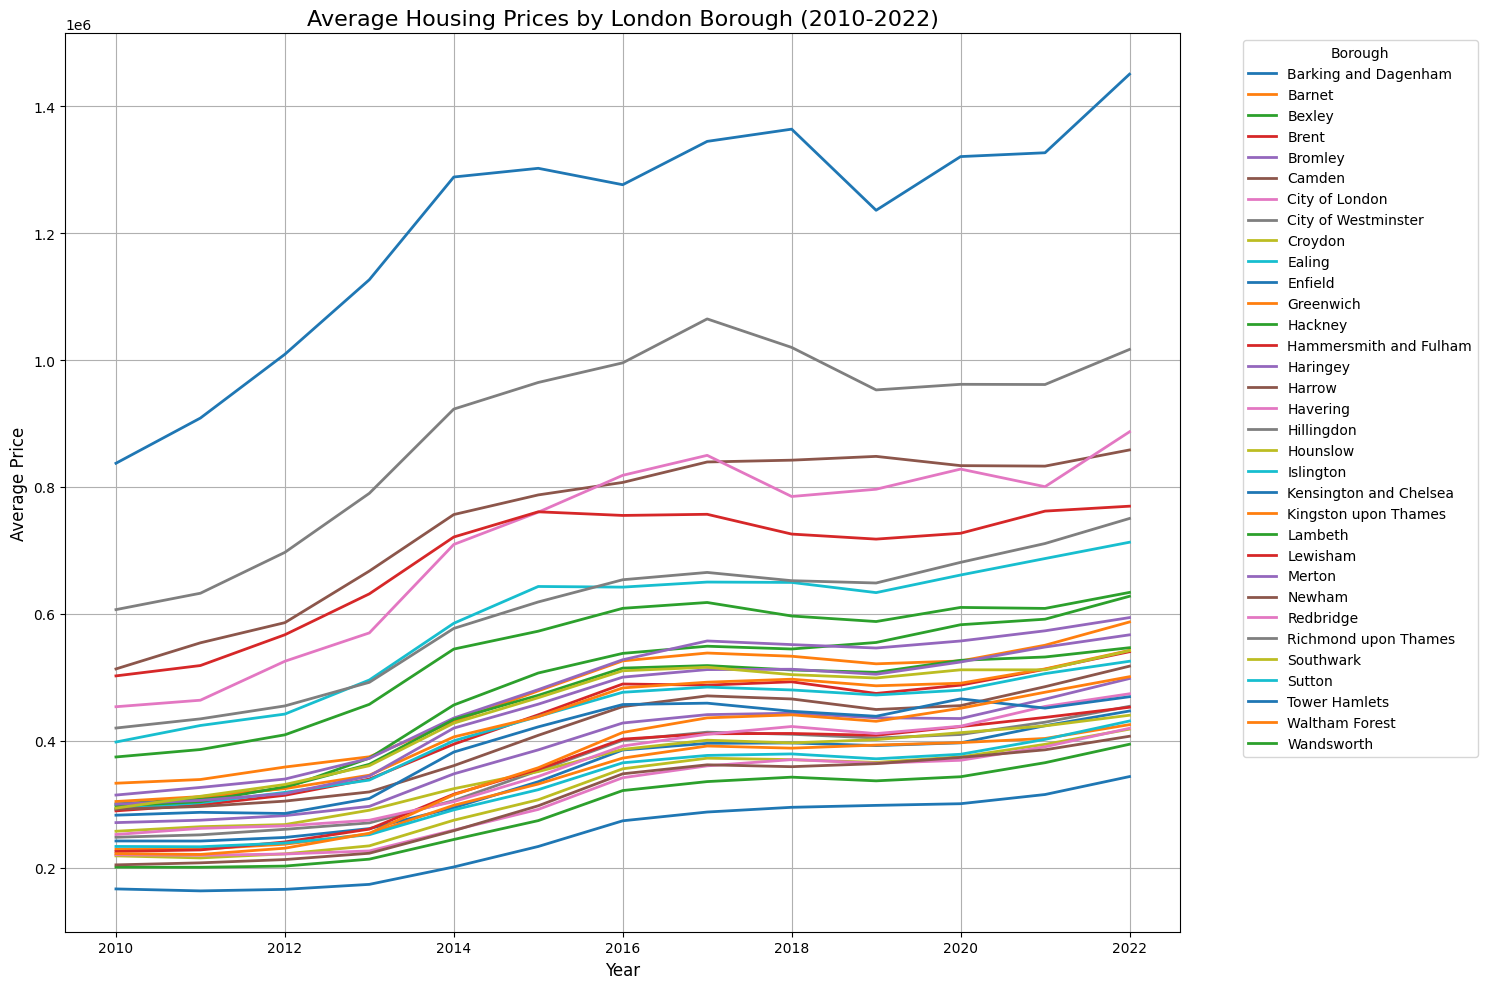

In [ ]:
import matplotlib.pyplot as plt

# Pivot the data to have years on the x-axis and boroughs as different series
pivot_data = ldn_housing.pivot(index='Year', columns='RegionName', values='AveragePrice')

# Plotting each borough's average price trend over the years
plt.figure(figsize=(15, 10))  # Set the figure size

for column in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[column], marker='', linewidth=2, label=column)

# Customizing the plot
plt.title('Average Housing Prices by London Borough (2010-2022)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping

# Show the plot
plt.show()


## Ranking the Borough by Avg. Price

In [ ]:
# Group by 'Year' and 'RegionName' and calculate the mean 'AveragePrice'
yearly_rank = ldn_housing.groupby(['Year', 'RegionName'])['AveragePrice'].mean().reset_index()

# Group by  each year, rank the boroughs based on 'AveragePrice'
yearly_rank['Rank'] = yearly_rank.groupby('Year')['AveragePrice'].rank(method='dense', ascending=False)

# Sort the data by 'Year' and then by 'Rank'
ranked_boroughs_by_year = yearly_rank.sort_values(by=['Year', 'Rank'])

# If you want to see the results for a specific year, for example, 2022:
ranked_boroughs_2022 = ranked_boroughs_by_year[ranked_boroughs_by_year['Year'] == 2022]

print(ranked_boroughs_2022)


     Year              RegionName  AveragePrice  Rank
416  2022  Kensington and Chelsea  1.450443e+06   1.0
403  2022     City of Westminster  1.016693e+06   2.0
402  2022          City of London  8.868899e+05   3.0
401  2022                  Camden  8.583162e+05   4.0
409  2022  Hammersmith and Fulham  7.696730e+05   5.0
423  2022    Richmond upon Thames  7.503122e+05   6.0
415  2022               Islington  7.128771e+05   7.0
428  2022              Wandsworth  6.337947e+05   8.0
408  2022                 Hackney  6.277343e+05   9.0
410  2022                Haringey  5.941199e+05  10.0
397  2022                  Barnet  5.872304e+05  11.0
420  2022                  Merton  5.669362e+05  12.0
418  2022                 Lambeth  5.466581e+05  13.0
417  2022    Kingston upon Thames  5.424336e+05  14.0
424  2022               Southwark  5.419928e+05  15.0
399  2022                   Brent  5.403546e+05  16.0
405  2022                  Ealing  5.253153e+05  17.0
411  2022                  H

#Crime & Birth Mother Dataset

In [ ]:
#crime data
crime_data=pd.read_csv("MPS Borough Level Crime 2021-2023.csv")
crime_data_hist=pd.read_csv("MPS Borough Level Crime 2010-2021.csv")
crime_data.head()

,MajorText,MinorText,LookUp_BoroughName,202110,202111,202112,202201,202202,202203,202204,...,202212,202301,202302,202303,202304,202305,202306,202307,202308,202309
0,Arson and Criminal Damage,Arson,Barking and Dagenham,7,6,1,4,4,3,5,...,1,3,3,2,2,5,2,5,8,5
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,126,109,116,126,110,116,126,...,99,96,101,118,104,109,126,138,118,129
2,Burglary,Burglary Business and Community,Barking and Dagenham,37,20,14,19,29,30,17,...,23,28,18,35,36,28,30,25,33,40
3,Burglary,Domestic Burglary,Barking and Dagenham,83,87,91,81,67,77,81,...,87,94,39,56,63,50,65,51,75,87
4,Drug Offences,Drug Trafficking,Barking and Dagenham,18,12,10,14,11,19,15,...,15,15,12,28,24,26,36,21,16,19


In [ ]:
#Merging dataset
result_crime=pd.merge(crime_data_hist,crime_data, on=['MajorText','MinorText','LookUp_BoroughName'],how='left')
result_crime[result_crime.isnull().any(axis=1)].groupby('MajorText').size() #look for which index has null values

MajorText
Burglary                                  1
Historical Fraud and Forgery             32
Miscellaneous Crimes Against Society    117
Possession of Weapons                     6
Public Order Offences                     5
Robbery                                   1
Violence Against the Person               2
dtype: int64

In [ ]:
#summarize the null values
result_crime.isnull().sum()[result_crime.isnull().sum() > 0]

202110    164
202111    164
202112    164
202201    164
202202    164
202203    164
202204    164
202205    164
202206    164
202207    164
202208    164
202209    164
202210    164
202211    164
202212    164
202301    164
202302    164
202303    164
202304    164
202305    164
202306    164
202307    164
202308    164
202309    164
dtype: int64

In [ ]:
def sum_columns_by_year(data, year_list):
    for year in year_list:
        months = [f'{str(year)}{month:02d}' for month in range(4, 13)] + [f'{str(year + 1)}{month:02d}' for month in range(1, 4)]
        result_crime[year] = data[months].sum(axis=1)
    return result_crime

#Use the function
sum_columns_by_year(result_crime,
                    [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])
result_crime.drop(result_crime.iloc[:,3:165],axis=1,inplace=True)
result_crime.head()

,MajorText,MinorText,LookUp_BoroughName,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Arson and Criminal Damage,Arson,Barking and Dagenham,114,125,63,49,73,78,69,77,59,71,47,63.0,49.0
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,2243,1927,1581,1551,1534,1794,1717,1602,1394,1379,1253,1456.0,1396.0
2,Burglary,Burglary Business and Community,Barking and Dagenham,640,726,705,536,475,488,441,357,376,339,259,292.0,287.0
3,Burglary,Domestic Burglary,Barking and Dagenham,1573,1711,1835,1471,1399,1046,913,1293,1206,1200,831,918.0,831.0
4,Drug Offences,Drug Trafficking,Barking and Dagenham,94,80,74,87,67,58,79,63,74,103,169,145.0,182.0


In [ ]:
#Check on one of the previous null value row
result_crime[:10:]

,MajorText,MinorText,LookUp_BoroughName,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Arson and Criminal Damage,Arson,Barking and Dagenham,114,125,63,49,73,78,69,77,59,71,47,63.0,49.0
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,2243,1927,1581,1551,1534,1794,1717,1602,1394,1379,1253,1456.0,1396.0
2,Burglary,Burglary Business and Community,Barking and Dagenham,640,726,705,536,475,488,441,357,376,339,259,292.0,287.0
3,Burglary,Domestic Burglary,Barking and Dagenham,1573,1711,1835,1471,1399,1046,913,1293,1206,1200,831,918.0,831.0
4,Drug Offences,Drug Trafficking,Barking and Dagenham,94,80,74,87,67,58,79,63,74,103,169,145.0,182.0
5,Drug Offences,Possession of Drugs,Barking and Dagenham,920,952,1066,1126,1022,1118,1018,757,918,1123,1565,1523.0,1385.0
6,Historical Fraud and Forgery,Historical Fraud and Forgery,Barking and Dagenham,639,635,676,0,0,0,0,0,0,0,0,0.0,0.0
7,Miscellaneous Crimes Against Society,Absconding from Lawful Custody,Barking and Dagenham,0,0,0,1,1,0,2,0,0,0,0,0.0,0.0
8,Miscellaneous Crimes Against Society,Bail Offences,Barking and Dagenham,0,0,0,0,0,2,8,0,0,1,0,0.0,1.0
9,Miscellaneous Crimes Against Society,Bigamy,Barking and Dagenham,0,0,1,0,0,0,0,0,0,2,1,2.0,0.0


In [ ]:
#make them all the values integers and renaming columns.
result_crime[[2021, 2022]] = result_crime[[2021, 2022]].astype(int)
result_crime.rename(columns={'MajorText':'crime_category','MinorText':'crime_desc','LookUp_BoroughName':'borough_name'},inplace=True)
result_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1727 entries, 0 to 1726
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   crime_category  1727 non-null   object
 1   crime_desc      1727 non-null   object
 2   borough_name    1727 non-null   object
 3   2010            1727 non-null   int64 
 4   2011            1727 non-null   int64 
 5   2012            1727 non-null   int64 
 6   2013            1727 non-null   int64 
 7   2014            1727 non-null   int64 
 8   2015            1727 non-null   int64 
 9   2016            1727 non-null   int64 
 10  2017            1727 non-null   int64 
 11  2018            1727 non-null   int64 
 12  2019            1727 non-null   int64 
 13  2020            1727 non-null   int64 
 14  2021            1727 non-null   int64 
 15  2022            1727 non-null   int64 
dtypes: int64(13), object(3)
memory usage: 229.4+ KB


In [ ]:
#Making a pivot table to sum all the crime based on crime_category and switch the years (2010-2023) into a new column of year.
crime_london = pd.pivot_table(result_crime,
                              values=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
                              index=['borough_name', 'crime_category'], #We do not need the crime_desc
                              aggfunc='sum')

# Reset index to make it a DataFrame
crime_london.reset_index(inplace=True)

crime_london1=pd.melt(crime_london, id_vars=['borough_name','crime_category'], var_name='Year', value_name='Crime_count')
crime_london1

,borough_name,crime_category,Year,Crime_count
0,Barking and Dagenham,Arson and Criminal Damage,2010,2357
1,Barking and Dagenham,Burglary,2010,2213
2,Barking and Dagenham,Drug Offences,2010,1014
3,Barking and Dagenham,Historical Fraud and Forgery,2010,639
4,Barking and Dagenham,Miscellaneous Crimes Against Society,2010,206
...,...,...,...,...
5143,Westminster,Robbery,2022,3643
5144,Westminster,Sexual Offences,2022,1602
5145,Westminster,Theft,2022,49710
5146,Westminster,Vehicle Offences,2022,4404


In [ ]:
crime_london1 = crime_london1.pivot_table(index=['borough_name', 'Year'], columns='crime_category', values='Crime_count', aggfunc='first')

# Resetting the index to make the DataFrame cleaner
crime_london1 = crime_london1.reset_index()

crime_london1.columns = [''.join(col).strip() for col in crime_london1.columns.values]
crime_london1 = crime_london1.reset_index().drop('index',axis=1)

crime_london1

,borough_name,Year,Arson and Criminal Damage,Burglary,Drug Offences,Historical Fraud and Forgery,Miscellaneous Crimes Against Society,Possession of Weapons,Public Order Offences,Robbery,Sexual Offences,Theft,Vehicle Offences,Violence Against the Person
0,Barking and Dagenham,2010,2357,2213,1014,639,206,136,404,937,257,3876,2962,3970
1,Barking and Dagenham,2011,2052,2437,1032,635,153,108,406,1030,270,3951,2855,3684
2,Barking and Dagenham,2012,1644,2540,1140,676,157,86,478,667,259,3627,2601,3312
3,Barking and Dagenham,2013,1600,2007,1213,0,235,65,618,526,297,3349,2487,3681
4,Barking and Dagenham,2014,1607,1874,1089,0,233,77,794,486,403,3227,1930,4495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,Westminster,2018,2346,4251,2178,0,412,483,3245,3614,1224,36210,4534,10542
425,Westminster,2019,2316,4740,3666,0,421,478,3364,4390,1186,44319,4773,10989
426,Westminster,2020,1958,2423,3273,0,650,276,2770,1410,842,12623,3219,8123
427,Westminster,2021,2319,2483,3177,0,547,367,3623,2746,1587,28609,3963,11430


In [ ]:
crime_london_categorized=pd.DataFrame(crime_london1.copy())
crime_london_categorized['violent_crimes'] = crime_london_categorized[['Violence Against the Person', 'Robbery', 'Sexual Offences']].sum(axis=1)
crime_london_categorized['property_crimes'] = crime_london_categorized[['Burglary', 'Arson and Criminal Damage', 'Theft', 'Vehicle Offences']].sum(axis=1)
crime_london_categorized['drug_crimes'] = crime_london_categorized['Drug Offences']
crime_london_categorized['other_crimes']= crime_london_categorized[['Historical Fraud and Forgery', 'Miscellaneous Crimes Against Society',
                                              'Possession of Weapons', 'Public Order Offences']].sum(axis=1)
crime_london_categorized['Total crimes']=crime_london_categorized[['violent_crimes',
                                        'property_crimes','drug_crimes','other_crimes']].sum(axis=1)

#remove the other crimes
crime_london_categorized.drop(crime_london1.iloc[:,2:14],axis=1,inplace=True)
crime_london_categorized

,borough_name,Year,violent_crimes,property_crimes,drug_crimes,other_crimes,Total crimes
0,Barking and Dagenham,2010,5164,11408,1014,1385,18971
1,Barking and Dagenham,2011,4984,11295,1032,1302,18613
2,Barking and Dagenham,2012,4238,10412,1140,1397,17187
3,Barking and Dagenham,2013,4504,9443,1213,918,16078
4,Barking and Dagenham,2014,5384,8638,1089,1104,16215
...,...,...,...,...,...,...,...
424,Westminster,2018,15380,47341,2178,4140,69039
425,Westminster,2019,16565,56148,3666,4263,80642
426,Westminster,2020,10375,20223,3273,3696,37567
427,Westminster,2021,15763,37374,3177,4537,60851


In [ ]:
#Birth Mother
birth_mother=pd.read_csv("births_by_mothers_country_of_birth_2001_to_2022.csv")
birth_mother.head()

,year,gss_code,usual_residence_of_mother,type,total_births_all,total_births_uk_mothers,total_births_overseas_mothers,overseas_mothers_total_EU,overseas_mothers_pre2004_EU_countries,overseas_mothers_post2004_EU_accession_countries,overseas_mothers_non_EU_europe,overseas_mothers_asia,overseas_mothers_africa,overseas_mothers_rest_of_world
0,2001,E92000001,ENGLAND,Country,563744,467536,96208,17632,14388,3244,5228,39147,20558,13643
1,2001,W92000004,WALES,Country,30616,29022,1594,430,380,50,58,682,246,178
2,2001,E12000001,NORTH EAST,Region,25949,24429,1520,324,284,40,72,768,231,125
3,2001,E12000002,NORTH WEST,Region,75201,67632,7569,1136,989,147,199,4743,936,555
4,2001,E12000003,YORKSHIRE AND THE HUMBER,Region,55625,49071,6554,860,733,127,173,4611,484,426


In [ ]:
birth_mother[birth_mother.isnull().any(axis=1)].groupby('year').size()

Series([], dtype: int64)

The result above shows that there's no null values in birth mother dataset

In [ ]:
#Merging Crime and Birth Dataset
crime_and_birth=pd.merge(crime_london_categorized, birth_mother,how='left',left_on=['borough_name', 'Year'],
                       right_on=['usual_residence_of_mother','year']).drop(columns=
                       ['year','gss_code','usual_residence_of_mother','type'])

#Dropping other birth columns except total birth all, uk, and overseas
crime_and_birth.drop(crime_and_birth.iloc[:,-7::],axis=1,inplace=True)

#Renaming Wesminster into City of Westminster
crime_and_birth.replace("Westminster","City of Westminster",inplace=True)
crime_and_birth

,borough_name,Year,violent_crimes,property_crimes,drug_crimes,other_crimes,Total crimes,total_births_all,total_births_uk_mothers,total_births_overseas_mothers
0,Barking and Dagenham,2010,5164,11408,1014,1385,18971,3729.0,1583.0,2146.0
1,Barking and Dagenham,2011,4984,11295,1032,1302,18613,3688.0,1460.0,2228.0
2,Barking and Dagenham,2012,4238,10412,1140,1397,17187,3957.0,1561.0,2396.0
3,Barking and Dagenham,2013,4504,9443,1213,918,16078,3796.0,1411.0,2383.0
4,Barking and Dagenham,2014,5384,8638,1089,1104,16215,3569.0,1288.0,2280.0
...,...,...,...,...,...,...,...,...,...,...
424,City of Westminster,2018,15380,47341,2178,4140,69039,2510.0,724.0,1786.0
425,City of Westminster,2019,16565,56148,3666,4263,80642,2315.0,624.0,1691.0
426,City of Westminster,2020,10375,20223,3273,3696,37567,2094.0,569.0,1525.0
427,City of Westminster,2021,15763,37374,3177,4537,60851,2110.0,632.0,1478.0


# Constructing

In [ ]:
construction_start=pd.read_csv("UK Start Construction.csv")
construction_complete=pd.read_csv("UK Complete Construction.csv")
construction_start.head()

,Local Authority Code,Region or Country Name,Local Authority Name,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022,2022-2023
0,E06000001,North East,Hartlepool,230,230,190,130,280,360,270,280,250,260,160,330,490,590
1,E06000002,North East,Middlesbrough,280,..,200,230,510,560,500,350,470,610,420,540,690,480
2,E06000003,North East,Redcar and Cleveland,240,210,280,210,410,320,480,420,420,410,370,430,390,510
3,E06000004,North East,Stockton-on-Tees,440,500,560,490,540,540,510,840,860,"1,030",580,390,590,800
4,E06000005,North East,Darlington,130,230,110,100,310,410,240,450,440,540,500,430,440,520


In [ ]:
#renaming the columns into years
old_column=['2009-2010','2010-2011','2011-2012','2012-2013','2013-2014','2014-2015','2015-2016','2016-2017',
            '2017-2018','2018-2019','2019-2020','2020-2021','2021-2022','2022-2023']
new_column=[2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]
construction_start.rename(columns=dict(zip(old_column,new_column)),inplace=True)
construction_complete.rename(columns=dict(zip(old_column,new_column)),inplace=True)

#drop 2009
construction_start.drop(columns=2009,inplace=True)
construction_complete.drop(columns=2009,inplace=True)

In [ ]:
construction_start1=pd.melt(construction_start, id_vars=['Local Authority Code','Region or Country Name','Local Authority Name'],
                           var_name='Year', value_name='Construction Start')
construction_complete1=pd.melt(construction_complete, id_vars=['Local Authority Code','Region or Country Name','Local Authority Name'],
                           var_name='Year', value_name='Construction Complete')
construction=pd.merge(construction_start1,construction_complete1, on=['Local Authority Code','Region or Country Name','Local Authority Name','Year'],
                      how='left')
construction[(construction['Construction Start']==' .. ')]

,Local Authority Code,Region or Country Name,Local Authority Name,Year,Construction Start,Construction Complete
1,E06000002,North East,Middlesbrough,2010,..,..
12,E06000006,North West,Halton,2010,..,..
13,E06000007,North West,Warrington,2010,..,..
17,E06000050,North West,Cheshire West and Chester,2010,..,..
27,E07000120,North West,Hyndburn,2010,..,..
...,...,...,...,...,...,...
1865,N09000007,Northern Ireland,Lisburn and Castlereagh,2014,..,..
1866,N09000008,Northern Ireland,Mid and East Antrim,2014,..,..
1867,N09000009,Northern Ireland,Mid Ulster,2014,..,..
1868,N09000010,Northern Ireland,"Newry, Mourne and Down",2014,..,..


In [ ]:
#Sort the data since we want to do backfill
sorted_construction= construction.sort_values(['Local Authority Code','Region or Country Name','Local Authority Name'])
sorted_construction.reset_index(drop=True, inplace=True)

In [ ]:
#Here we assume that:
# ".." means the data is not available
# " - " means that they have no construction started/finish that year

#Backfill for the ..
sorted_construction['Construction Start'] = sorted_construction.groupby('Local Authority Name')['Construction Start'].apply(lambda x: x.replace(' .. ', method='bfill'))
sorted_construction['Construction Complete'] = sorted_construction.groupby('Local Authority Name')['Construction Complete'].apply(lambda x: x.replace(' .. ', method='bfill'))

#Replace with 0 for -
sorted_construction.replace(' - ',0,inplace=True)

#Keep only London data
sorted_construction=sorted_construction[sorted_construction['Region or Country Name']=='London']
sorted_construction.drop(columns=['Local Authority Code','Region or Country Name'],inplace=True)
sorted_construction.reset_index(drop=True, inplace=True)

#Rename Westminster into City of Westminster to make it the same as London Housing Data
sorted_construction.replace("Westminster","City of Westminster",inplace=True)

In [ ]:
# We noticed that thousands are seperated by "," inside the data
# This results in the columns being treated as object instead of integer
# Here we want to remove "," and convert the data into integers as well.
sorted_construction[["Construction Start", "Construction Complete"]] = sorted_construction[["Construction Start",
                "Construction Complete"]].apply(lambda x: x.str.replace(',', ''))

sorted_construction[["Construction Start", "Construction Complete"]] = sorted_construction[["Construction Start",
                "Construction Complete"]].astype(float) #in the mean time

# Merging Housing-Crime-Constructing

In [ ]:
ldn_housing.head()

,index,Year,RegionName,AveragePrice,SalesVolume,CashPrice,CashSalesVolume,MortgagePrice,MortgageSalesVolume,DetachedPrice,SemiDetachedPrice,TerracedPrice,FlatPrice,FTBPrice,FOOPrice,NewPrice,NewSalesVolume,OldPrice,OldSalesVolume
0,306,2010,Barking and Dagenham,166560.705275,1453.0,NaN,0.0,NaN,0.0,283708.563142,205080.838017,178582.284508,133937.563592,NaN,NaN,211337.899167,186.0,164391.811392,1267.0
1,307,2011,Barking and Dagenham,163465.144225,1458.0,NaN,0.0,NaN,0.0,283811.994975,201925.835058,174660.244917,132265.469817,NaN,NaN,215004.420117,246.0,160542.114675,1212.0
2,308,2012,Barking and Dagenham,165863.911600,1342.0,164186.754900,200.0,166585.462258,1142.0,287895.387092,205896.236383,178640.583350,131034.846708,157769.813717,179449.491142,210808.039375,137.0,163706.551258,1205.0
3,309,2013,Barking and Dagenham,173733.624933,1788.0,171367.400258,299.0,174254.474233,1489.0,302239.985933,216456.226725,187610.398850,136009.441617,164790.530183,187952.614308,221472.525033,233.0,171362.116258,1555.0
4,310,2014,Barking and Dagenham,201172.229417,2259.0,198139.843192,351.0,201828.067583,1908.0,352564.659317,252143.142608,217154.118592,157176.494558,190849.805517,217539.632117,256083.061050,195.0,198395.461400,2064.0


In [ ]:
sorted_construction.head(20)

,Local Authority Name,Year,Construction Start,Construction Complete
0,City of London,2010,280.0,NaN
1,City of London,2011,10.0,NaN
2,City of London,2012,310.0,10.0
3,City of London,2013,NaN,NaN
4,City of London,2014,NaN,160.0
5,City of London,2015,170.0,10.0
6,City of London,2016,100.0,10.0
7,City of London,2017,NaN,NaN
8,City of London,2018,NaN,170.0
9,City of London,2019,NaN,NaN


In [ ]:
crime_and_birth.head(20)

,borough_name,Year,violent_crimes,property_crimes,drug_crimes,other_crimes,Total crimes,total_births_all,total_births_uk_mothers,total_births_overseas_mothers
0,Barking and Dagenham,2010,5164,11408,1014,1385,18971,3729.0,1583.0,2146.0
1,Barking and Dagenham,2011,4984,11295,1032,1302,18613,3688.0,1460.0,2228.0
2,Barking and Dagenham,2012,4238,10412,1140,1397,17187,3957.0,1561.0,2396.0
3,Barking and Dagenham,2013,4504,9443,1213,918,16078,3796.0,1411.0,2383.0
4,Barking and Dagenham,2014,5384,8638,1089,1104,16215,3569.0,1288.0,2280.0
5,Barking and Dagenham,2015,6293,8757,1176,1316,17542,3850.0,1323.0,2527.0
6,Barking and Dagenham,2016,6242,9005,1097,1358,17702,3973.0,1310.0,2663.0
7,Barking and Dagenham,2017,6853,9677,820,1463,18813,3870.0,1297.0,2573.0
8,Barking and Dagenham,2018,7152,9083,992,1427,18654,3700.0,1219.0,2481.0
9,Barking and Dagenham,2019,8037,9456,1226,1643,20362,3574.0,1146.0,2428.0


In [ ]:
#Before merging with london housing data, we merge crime birth and construction datasets first.
crime_construction_birth=pd.merge(crime_and_birth,sorted_construction,how='left',
                left_on=['borough_name','Year'],
                right_on=['Local Authority Name', 'Year']).drop('Local Authority Name',axis=1)

all_dataset=pd.merge(ldn_housing, crime_construction_birth,
                    how='left',left_on=['RegionName','Year'],
                    right_on=['borough_name','Year']).drop('borough_name',axis=1)

In [ ]:
info_row = ['Year','Borough names','Average housing price overall','Number of house sales',
            'House price if bought cash', 'Number of house bought cash',
            'House price if mortgage', 'Number of mortgage house bought ',
            'Detached house price', 'Semi-detached house price','Terraced house price', 'Flat price',
            'FTB Price','FOO Price','New house price', 'Number of new house purchased',
            'Old house price','Number of old house purchased','Violence Against the Person, Robbery, Sexual Offences',
            'Burglary, Arson and Criminal Damage, Theft, Vehicle Offences', 'Drug Offences',
            'Historical Fraud and Forgery, Miscellaneous Crimes Against Society, Possession of Weapons, Public Order Offences',
            'Total number of crimes','Total newborns','Total newborns with UK nationality mothers',
            'Total newborns with overseas nationality mothers',
            'Number of house construction started','Number of house construction completed']
dataset_dict={'Columns':all_dataset.columns,'Description':info_row}
#dataset_info=pd.DataFrame(dataset_dict)
all_dataset.head()

,index,Year,RegionName,AveragePrice,SalesVolume,CashPrice,CashSalesVolume,MortgagePrice,MortgageSalesVolume,DetachedPrice,...,violent_crimes,property_crimes,drug_crimes,other_crimes,Total crimes,total_births_all,total_births_uk_mothers,total_births_overseas_mothers,Construction Start,Construction Complete
0,306,2010,Barking and Dagenham,166560.705275,1453.0,NaN,0.0,NaN,0.0,283708.563142,...,5164.0,11408.0,1014.0,1385.0,18971.0,3729.0,1583.0,2146.0,390.0,350.0
1,307,2011,Barking and Dagenham,163465.144225,1458.0,NaN,0.0,NaN,0.0,283811.994975,...,4984.0,11295.0,1032.0,1302.0,18613.0,3688.0,1460.0,2228.0,550.0,340.0
2,308,2012,Barking and Dagenham,165863.911600,1342.0,164186.754900,200.0,166585.462258,1142.0,287895.387092,...,4238.0,10412.0,1140.0,1397.0,17187.0,3957.0,1561.0,2396.0,460.0,460.0
3,309,2013,Barking and Dagenham,173733.624933,1788.0,171367.400258,299.0,174254.474233,1489.0,302239.985933,...,4504.0,9443.0,1213.0,918.0,16078.0,3796.0,1411.0,2383.0,610.0,300.0
4,310,2014,Barking and Dagenham,201172.229417,2259.0,198139.843192,351.0,201828.067583,1908.0,352564.659317,...,5384.0,8638.0,1089.0,1104.0,16215.0,3569.0,1288.0,2280.0,320.0,800.0


# Data Exploratory

In [ ]:
# Make a Distribution plot function
def plottng_distribution(row,column,dataset,columns_to_plot):
    fig, axs= plt.subplots(row,column,figsize=(12,8))

    # Flatten the axs array to iterate over subplots
    axs_flat = axs.flatten()

    # Plot histograms using Seaborn on each subplot
    for col, ax in zip(columns_to_plot, axs_flat):
        sns.histplot(dataset[col], ax=ax)
        ax.set_title(col)

    # Remove empty plot if there are any:
    if row*column > len(columns_to_plot):
        for ax in axs_flat[len(columns_to_plot):]:
            ax.remove()

    # Adjust layout to prevent clipping of titles
    plt.tight_layout()

    # Show the histograms
    plt.show()

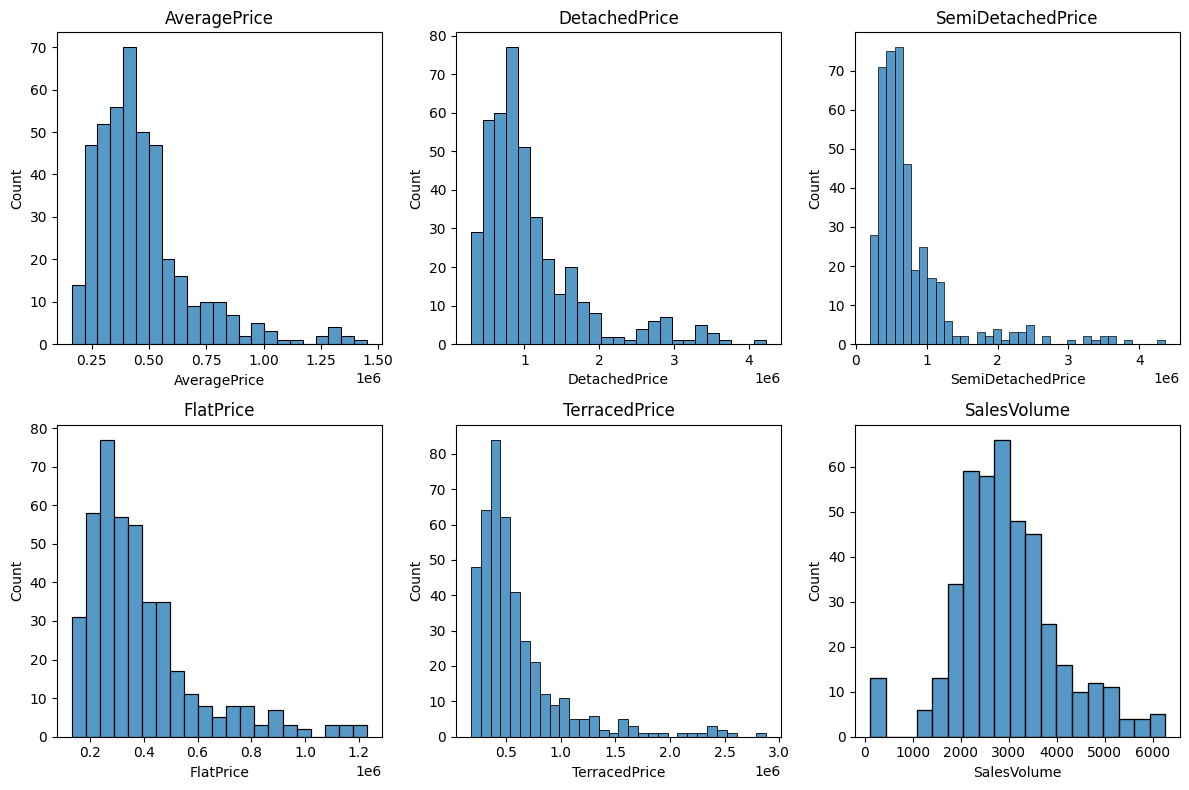

In [ ]:
#Plotting House price and sales volume.
columns_to_plot = ["AveragePrice", "DetachedPrice", "SemiDetachedPrice",
                "FlatPrice", "TerracedPrice", "SalesVolume"]

plottng_distribution(2,3,all_dataset,columns_to_plot)

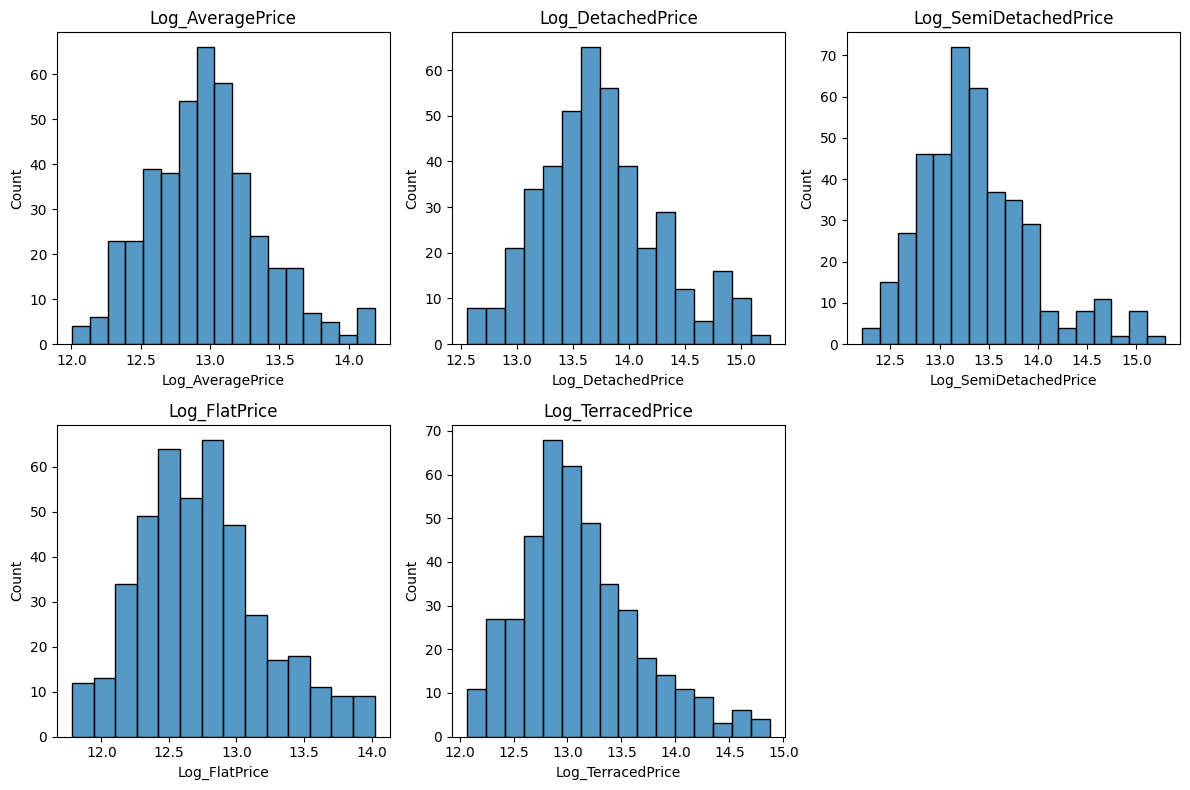

In [ ]:
#Transforming these variables because they are skewed, except sales volume.

def transforming_log_variable(dataset,columns_to_transform):
    for i in columns_to_transform:
        dataset["Log_"+i]= dataset[i].apply(lambda x: math.log(x) if x > 0 else None)

#Applying the formula
columns_to_transform=["DetachedPrice","SemiDetachedPrice","AveragePrice","FlatPrice","TerracedPrice"]
transforming_log_variable(all_dataset,columns_to_transform)

#Plot the transformed variables.
columns_to_plot = ["Log_AveragePrice", "Log_DetachedPrice", "Log_SemiDetachedPrice",
                "Log_FlatPrice", "Log_TerracedPrice"]

plottng_distribution(2,3,all_dataset,columns_to_plot)

### Crime - Birth Data Exploratory

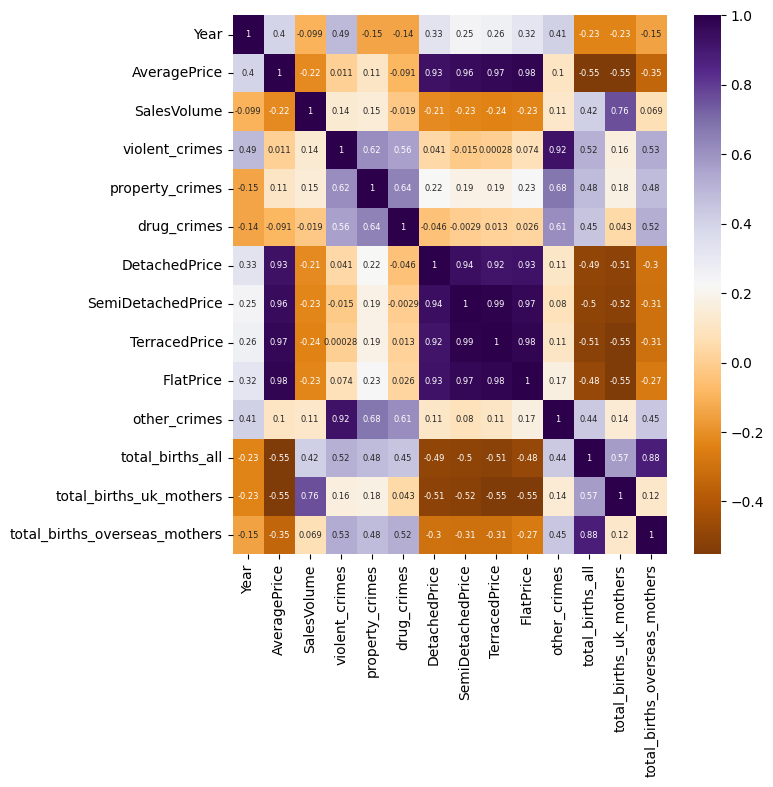

In [ ]:
crime_analysis=all_dataset[['Year', 'RegionName', 'AveragePrice', 'SalesVolume',
                            'violent_crimes', 'property_crimes', 'drug_crimes',
                            'DetachedPrice', 'SemiDetachedPrice', 'TerracedPrice', 'FlatPrice',
                            'other_crimes', 'total_births_all',
                            'total_births_uk_mothers', 'total_births_overseas_mothers']]
crime_analysis=crime_analysis[(crime_analysis['RegionName']!= 'City of London') &
                                (crime_analysis['RegionName']!= 'City of Westminster') &
                                (crime_analysis['RegionName']!= 'Hackney')]

#plotting the correlation
plt.figure(figsize=(7,7))
sns.heatmap(crime_analysis.corr(),annot=True,cmap='PuOr',annot_kws={"size":6})
plt.show()

In [ ]:
crime_analysis[crime_analysis["total_births_all"].isnull()]

,Year,RegionName,AveragePrice,SalesVolume,violent_crimes,property_crimes,drug_crimes,DetachedPrice,SemiDetachedPrice,TerracedPrice,FlatPrice,other_crimes,total_births_all,total_births_uk_mothers,total_births_overseas_mothers


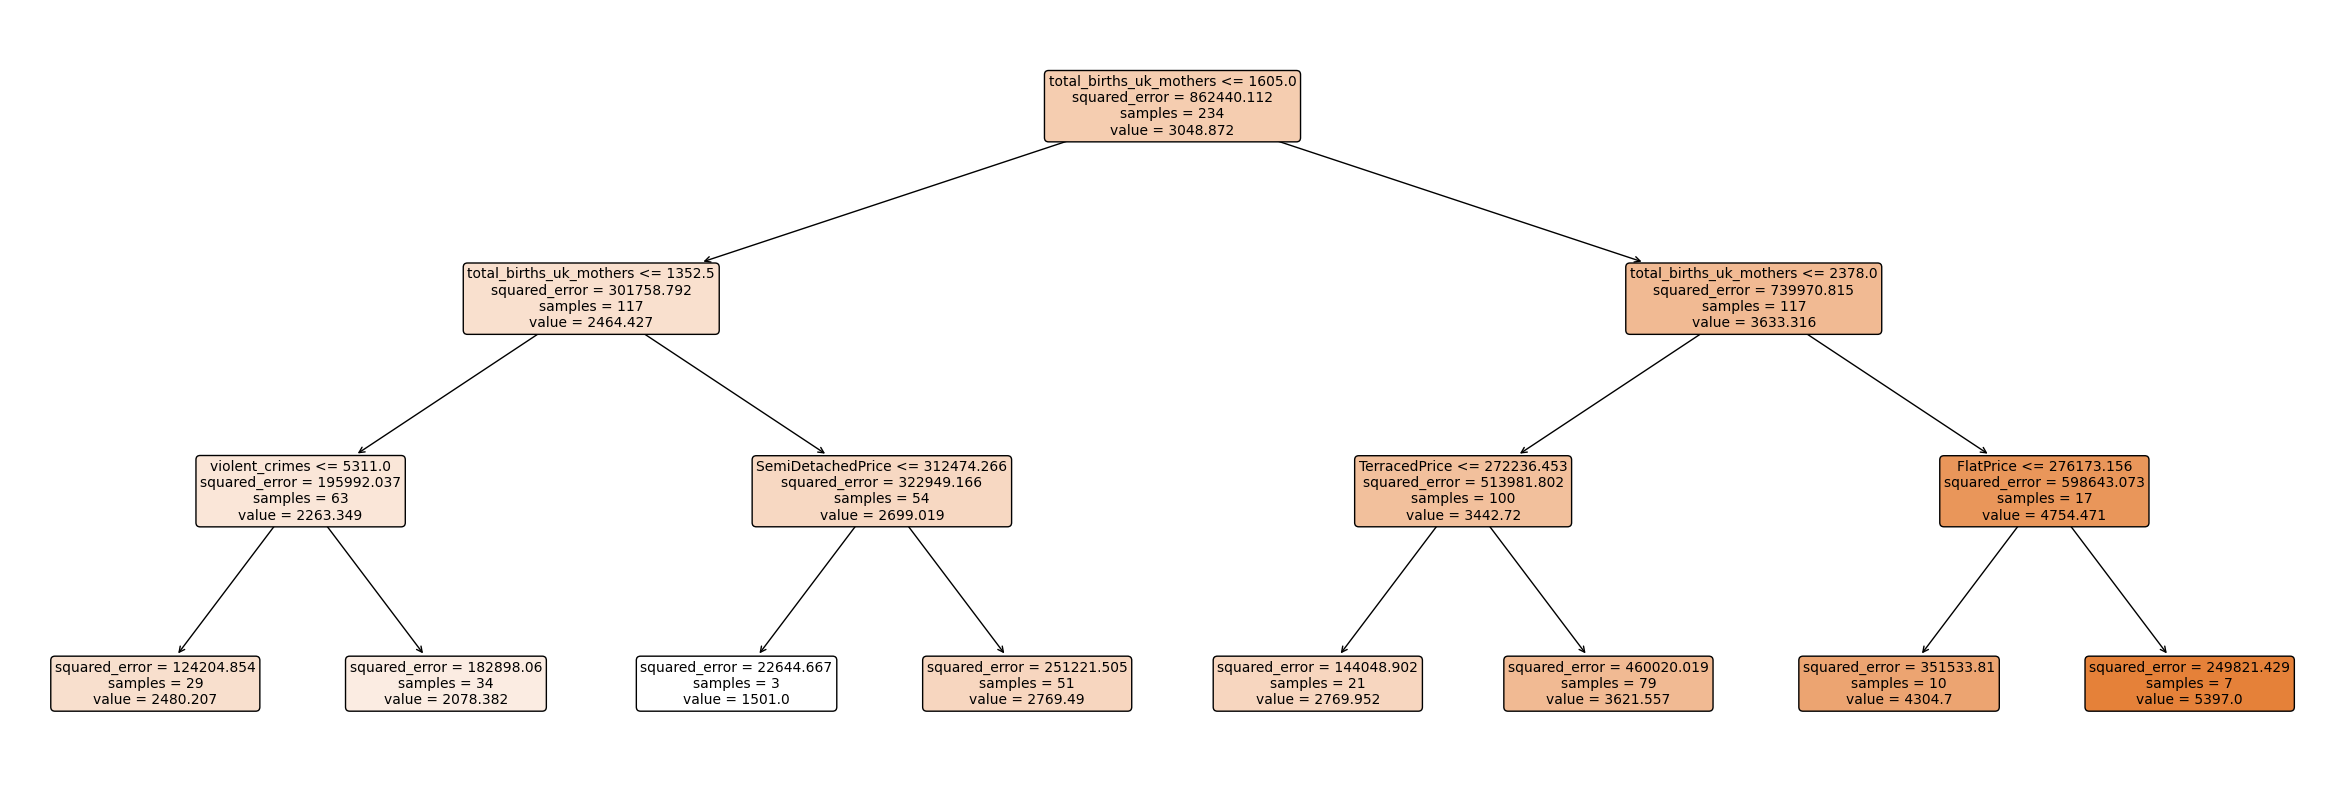

In [ ]:
#Trial

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import accuracy_score, mean_squared_error

#assigning features and target decision tree regression
features = crime_analysis[['DetachedPrice', 'SemiDetachedPrice', 'TerracedPrice', 'FlatPrice',
                'violent_crimes', 'property_crimes', 'drug_crimes', 'other_crimes',
                'total_births_uk_mothers', 'total_births_overseas_mothers','RegionName']]
target_regression = crime_analysis['SalesVolume']  # Replace 'SalesVolume' with your regression target

# Encode categorical variables
features_encoded = pd.get_dummies(features, columns=['RegionName'], drop_first=True)

# Split the data
X_train, X_test, y_train_regression, y_test_regression = train_test_split(
    features_encoded, target_regression, test_size=0.4, random_state=42)

# Initialize and fit the Decision Tree models
regressor_model = DecisionTreeRegressor(max_depth=3)

regressor_model.fit(X_train, y_train_regression)

# Make predictions
predictions_regression = regressor_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test_regression, predictions_regression)

# Plot the Decision Tree
plt.figure(figsize=(30, 10))
plt.title("Decision Tree Regressor")
tree_plot = plot_tree(regressor_model, feature_names=features_encoded.columns, filled=True, rounded=True, fontsize=10)
plt.show()

Random Forest Mean Squared Error: 303069.87964752497
Random Forest Root Mean Squared Error: 550.5178286372976


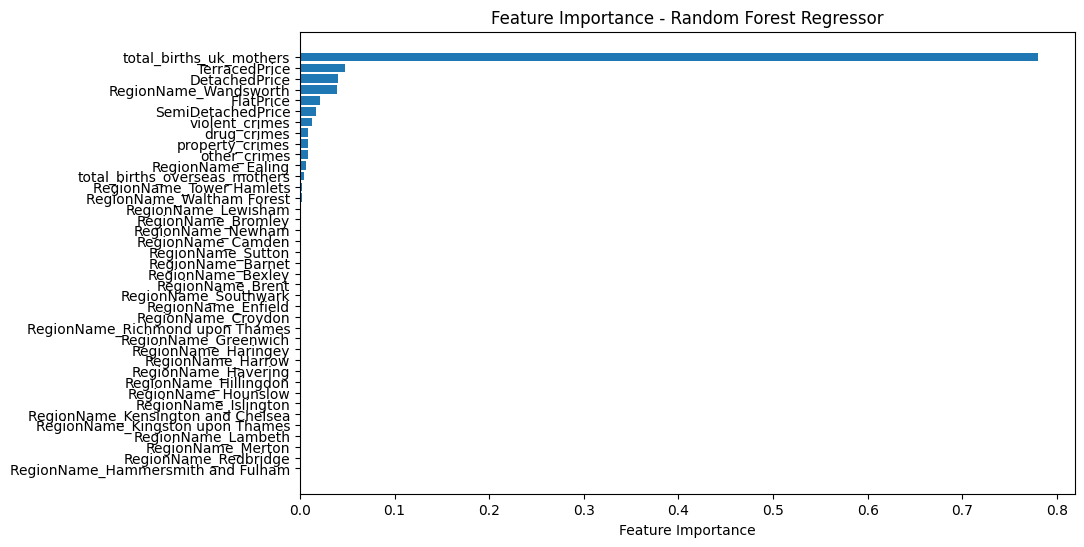

In [ ]:
#Random


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Rest of your code remains the same up to model initialization

# Initialize and fit the Random Forest Regressor
forest_regressor_model = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)

forest_regressor_model.fit(X_train, y_train_regression)

# Make predictions
predictions_forest_regression = forest_regressor_model.predict(X_test)

# Evaluate model performance
mse_forest = mean_squared_error(y_test_regression, predictions_forest_regression)
print(f"Random Forest Mean Squared Error: {mse_forest}")

rmse = np.sqrt(mse_forest)

# Display the RMSE
print(f"Random Forest Root Mean Squared Error: {rmse}")
# Random Forest doesn't have a direct 'plot_tree' method like DecisionTreeRegressor
# If you want to visualize individual trees in the forest, you can use the following:

# for tree in forest_regressor_model.estimators_:
#     plt.figure(figsize=(10, 5))
#     plt.title("Random Forest Tree")
#     tree_plot = plot_tree(tree, feature_names=features_encoded.columns, filled=True, rounded=True, fontsize=10)
#     plt.show()

feature_importances = forest_regressor_model.feature_importances_

# Get feature names from the encoded features
feature_names = features_encoded.columns

# Sort indices based on importance
indices = np.argsort(feature_importances)

# Plotting
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Random Forest Regressor")
plt.barh(range(len(indices)), feature_importances[indices], align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Feature Importance")
plt.show()

# PLACE HOLDER FOR CODE

In [ ]:
# Assuming you have two pandas DataFrames: df_housing and df_construction
# Both DataFrames should have 'borough' and 'year' columns
lagged_analysis=all_dataset[['Year', 'RegionName', 'AveragePrice', 'SalesVolume',
                            'Construction Start', 'Construction Complete']]


# Sort the data by borough and year to ensure that the lagged features make sense
lagged_analysis.sort_values(by=['RegionName', 'Year'], inplace=True)

# Create lagged construction features
# This will shift the 'construction_end' column by one year within each borough
lagged_analysis['construction_end_lagged'] = lagged_analysis.groupby('RegionName')['Construction Complete'].shift(2)

# Calculate the year-over-year percentage change in housing prices
lagged_analysis['housing_price_change'] = lagged_analysis.groupby('RegionName')['AveragePrice'].pct_change() * 100

# Drop NaN values that result from lagging and percentage change
lagged_analysis.dropna(inplace=True)

lagged_analysis['TotalConstruction'] = lagged_analysis['Construction Start'] + lagged_analysis['Construction Complete']

# Now, calculate the correlation
corr_end_lagged = lagged_analysis['housing_price_change'].corr(lagged_analysis['construction_end_lagged'])
corr_start = lagged_analysis['housing_price_change'].corr(lagged_analysis['Construction Start'])
corr_total = lagged_analysis['housing_price_change'].corr(lagged_analysis['TotalConstruction'])
corr_end = lagged_analysis['housing_price_change'].corr(lagged_analysis['TotalConstruction'])

print(f"The correlation coefficient between lagged construction completion and housing price change is: {corr_end_lagged}")
print(f"Correlation with Construction Starts: {corr_start}")
print(f"Correlation with Construction Ends: {corr_total}")
print(f"Correlation with Total Construction: {corr_end}")

#  plot it using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot to visualize the relationship
sns.scatterplot(data=lagged_analysis, x='construction_end_lagged', y='housing_price_change')
plt.title('Lagged Construction Completion vs. Housing Price Change')
plt.xlabel('Lagged Construction Completion')
plt.ylabel('Year-over-Year Housing Price Change (%)')
plt.show()


In [ ]:
corr_analysis=all_dataset[['Year', 'RegionName', 'AveragePrice', 'SalesVolume',
                            'Construction Start', 'Construction Complete']]

corr_analysis['TotalConstruction'] = corr_analysis['Construction Start'] + corr_analysis['Construction Complete']

# Now we explore more on correlation of these var
correlation_starts = corr_analysis['AveragePrice'].corr(corr_analysis['Construction Start'])
correlation_ends = corr_analysis['AveragePrice'].corr(corr_analysis['Construction Complete'])
correlation_total = corr_analysis['AveragePrice'].corr(corr_analysis['TotalConstruction'])

print(f"Correlation with Construction Starts: {correlation_starts}")
print(f"Correlation with Construction Ends: {correlation_ends}")
print(f"Correlation with Total Construction: {correlation_total}")


## Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# #settingup the dataset used for reggression
# regg_analysis=all_dataset[['Year', 'RegionName', 'AveragePrice', 'SalesVolume',
#                             'Construction Start', 'Construction Complete']]

# # One-hot encoding the 'RegionName' column
# regg_encoded = pd.get_dummies(regg_analysis, columns=['RegionName'])


# # Selecting the features and target variable
# X = regg_encoded.drop(['AveragePrice'], axis=1)  # Independent variable(s)
# y = regg_encoded['AveragePrice'] # Dependent variable

# # Handling missing values (simple imputation, dropping, etc.)
# # This is a basic example where we drop rows with missing values
# X = X.dropna()
# y = y[X.index]  # Ensure that y only contains rows that exist in X after dropping NaNs

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = LinearRegression()
# model.fit(X_train, y_train)


# # Making predictions
# y_pred = model.predict(X_test)

# # Evaluating the model
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# accuracy = model.score(X_test, y_test)

# print(f"Mean Squared Error: {mse}")
# print(f"R^2 Score: {r2}")
# print(f'Accuracy: {accuracy}')

In [ ]:
#logistic regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

X = regg_2_encoded.drop(['SalesVolume'], axis=1)  # Independent variable(s) anything beside Sales Volume
y = regg_2_encoded['SalesVolume'] # Dependent variable

# Handling missing values (simple imputation, dropping, etc.)
# This is a basic example where we drop rows with missing values
X = X.dropna()
y = y[X.index]  # Ensure that y only contains rows that exist in X after dropping NaNs

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_3 = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
model_3.fit(X_train, y_train)

# Making predictions
y_pred = model_3.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

In [ ]:
#Linear Regression
# Selecting the features and target variable
X = final_combined_encoded.drop(['SalesVolume'], axis=1)  # Independent variable(s) anything beside Sales Volume
y = final_combined_encoded['SalesVolume'] # Dependent variable

# Handling missing values (simple imputation, dropping, etc.)
# This is a basic example where we drop rows with missing values
X = X.dropna()
y = y[X.index]  # Ensure that y only contains rows that exist in X after dropping NaNs

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_1 = LinearRegression()
model_1.fit(X_train, y_train)


# Making predictions
y_pred = model_1.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = model_1.score(X_test, y_test)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f'Accuracy: {accuracy}')

In [ ]:
# Pivot the data to have years on the x-axis and boroughs as different series
pivot_data = ldn_housing_cpy.pivot(index='Year', columns='RegionName', values='AveragePrice')

# Plotting each borough's average price trend over the years
plt.figure(figsize=(15, 10))  # Set the figure size

for column in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[column], marker='', linewidth=2, label=column)

# Customizing the plot
plt.title('Average Housing Prices by London Borough (2010-2022)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping

# Show the plot
plt.show()


In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant

# # Assuming 'X' is your DataFrame with independent variables
# # Add a constant term to the independent variables
# X_with_constant = add_constant(X)

# # Calculate VIF for each variable
# vif_data = pd.DataFrame()
# vif_data["Variable"] = X_with_constant.columns
# vif_data["VIF"] = [variance_inflation_factor(X_with_constant.values, i) for i in range(X_with_constant.shape[1])]

# # Display the VIF data
# print(vif_data)

In [ ]:
# # Since we already have the logs columns, we filter out the original columns and salesvolume
# # Using the Logs columns help to ensure normality for Linear Regression
# X = X.drop(['total_births_uk_mothers','Log_drug_crimes','total_births_overseas_mothers'],axis=1)
# y = final_combined_encoded['SalesVolume'] # Dependent variable

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# # Linear regression using statsmodels
# X_train_sm = sm.add_constant(X_train)  # Add constant term to features
# model_sm = sm.OLS(y_train, X_train_sm).fit()


# # Making predictions with the statsmodels model
# X_test_sm = sm.add_constant(X_test)  # Add constant term to test features
# y_pred_sm = model_sm.predict(X_test_sm)

# # Get the summary of the model
# summary_sm = model_sm.summary()

# print(summary_sm)

In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant

# # Assuming 'X' is your DataFrame with independent variables
# # Add a constant term to the independent variables
# X_with_constant = add_constant(X)

# # Calculate VIF for each variable
# vif_data = pd.DataFrame()
# vif_data["Variable"] = X_with_constant.columns
# vif_data["VIF"] = [variance_inflation_factor(X_with_constant.values, i) for i in range(X_with_constant.shape[1])]

# # Display the VIF data
# print(vif_data)

In [ ]:
# #settingup the dataset used for reggression
# final_combined = all_dataset[['RegionName', 'SalesVolume','Construction Start', 'Construction Complete',
#                             'AveragePrice', 'drug_crimes', 'other_crimes','total_births_uk_mothers',
#                             'total_births_overseas_mothers']]

# # One-hot encoding the 'RegionName' column
# final_combined_encoded = pd.get_dummies(final_combined, columns=['RegionName'],drop_first=True) #drop one of the column to prevent multicollinearity
# final_combined_encoded

In [ ]:
# # assume that the relationship between AveragePrice and CashPrice/MortgagePrice is consistent over the years.
# # Calculate the average ratio or difference for the years where data is available
# average_cash_ratio = (ldn_housing_cpy.loc[ldn_housing_cpy['CashPrice'].notnull(), 'CashPrice'] / ldn_housing_cpy.loc[ldn_housing_cpy['CashPrice'].notnull(), 'AveragePrice']).mean()
# average_mortgage_ratio = (ldn_housing_cpy.loc[ldn_housing_cpy['MortgagePrice'].notnull(), 'MortgagePrice'] / ldn_housing_cpy.loc[ldn_housing_cpy['MortgagePrice'].notnull(), 'AveragePrice']).mean()

# # Use the average ratio to estimate the missing values for 2010 and 2011
# # Impute missing values using .loc
# for index in ldn_housing_cpy.index:
#     if pd.isna(ldn_housing_cpy.loc[index, 'CashPrice']) or pd.isna(ldn_housing_cpy.loc[index, 'MortgagePrice']):
#         ldn_housing_cpy.loc[index, 'CashPrice'] = ldn_housing_cpy.loc[index, 'AveragePrice'] * average_cash_ratio
#         ldn_housing_cpy.loc[index, 'MortgagePrice'] = ldn_housing_cpy.loc[index, 'AveragePrice'] * average_mortgage_ratio

# # assume that the relationship between AveragePrice and FTBPrice/FOOPrice is consistent over the years.

# # Calculate the average ratio or difference for the years where data is available
# average_FTB_ratio = (ldn_housing_cpy.loc[ldn_housing_cpy['FTBPrice'].notnull(), 'FTBPrice'] / ldn_housing_cpy.loc[ldn_housing_cpy['FTBPrice'].notnull(), 'AveragePrice']).mean()
# average_FOO_ratio = (ldn_housing_cpy.loc[ldn_housing_cpy['FOOPrice'].notnull(), 'FOOPrice'] / ldn_housing_cpy.loc[ldn_housing_cpy['FOOPrice'].notnull(), 'AveragePrice']).mean()

# # Use the average ratio to estimate the missing values for 2010 and 2011
# # Impute missing values using .loc
# for index in ldn_housing_cpy.index:
#     if pd.isna(ldn_housing_cpy.loc[index, 'FTBPrice']) or pd.isna(ldn_housing_cpy.loc[index, 'FOOPrice']):
#         ldn_housing_cpy.loc[index, 'FTBPrice'] = ldn_housing_cpy.loc[index, 'AveragePrice'] * average_FTB_ratio
#         ldn_housing_cpy.loc[index, 'FOOPrice'] = ldn_housing_cpy.loc[index, 'AveragePrice'] * average_FOO_ratio

In [ ]:
# Here we want to see is there any relation between

# Aggregating average housing prices by year
average_volume_per_year = all_dataset.groupby('Year')['SalesVolume'].mean()

# Aggregating total construction starts by year
total_construction_per_year = all_dataset.groupby('Year')['Construction Start'].sum()

# Aggregating total construction completed by year
total_construction_end_year = all_dataset.groupby('Year')['Construction Complete'].sum()


# Merging the two Series into a DataFrame
comparison_df = pd.DataFrame({
    'AverageHouseVolume' : average_volume_per_year,
    'AverageHousingPrice': average_price_per_year,
    'TotalConstructionStarts': total_construction_per_year,
    'TotalConstructionCompleted' : total_construction_end_year
}).reset_index()

Recommendation Part

For future research, we suggest employing more sophisticated algorithms, such as Random Forest models, in subsequent analyses. Random Forest can capture complex, non-linear relationships better than the decision tree models currently employed, thereby providing a more nuanced and comprehensive understanding of the factors influencing housing prices.

Our current dataset provides a foundational understanding, but it is imperative to expand our variable set to include additional descriptors that could have substantial effects on housing prices. Variables such as specific house features (e.g., size, age, condition, architectural style), demographic trends (e.g., population nationalities, age distribution), and socioeconomic indicators (e.g., average income levels, and economic growth rates) should be considered. These variables could offer deeper insights into consumer preferences and market trends, enhancing the predictive accuracy of our models.

Future Research
If this research were to be pursued further in the future, additional data on council taxes, nearby school performances, and available transit would be essential in performing more comprehensive analyses. Furthermore, while total UK mothers' births were a common split in the regression tree, total international mothers' births were absent. This indicates that research could be conducted to assess the complexity of international mothers purchasing homes in the UK. While this initial study focuses on determining the most relevant economic and social factors influencing London's housing market, it also serves as a starting point and could be expanded to observe how education systems, transit, and population density impact our initial findings.

In future research, it is recommended to utilize more advanced analytical algorithms, such as Random Forest models, which are adept at capturing complex, non-linear relationships. This approach could offer a more nuanced understanding of the factors influencing housing prices compared to the decision tree models currently in use.

Moreover, while providing a foundational understanding, our existing dataset would benefit significantly from including a broader range of variables. To enhance the predictive accuracy and depth of our analysis, it's imperative to incorporate additional descriptors. These should include specific house features like size, age, condition, and architectural style, as well as broader demographic trends and socioeconomic indicators, such as population nationalities, age distribution, average income levels, and economic growth rates.

Further expanding our research scope, additional data elements like council taxes, nearby school performances, and available transit options are essential for more comprehensive analyses. An interesting aspect revealed in our current study is the prominence of total UK mothers' births in the regression tree, while total international mothers' births were notably absent. This observation suggests a potential area of research to explore the complexities surrounding international mothers purchasing homes in the UK. By adopting these approaches, we can significantly deepen our understanding of consumer preferences and market trends, thus refining the predictive models of housing markets.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5b74da8f-1934-41b4-ae90-13df8dfcd56d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>